# Analysis of Average Gross Rent in LA county

**Xinyi Cao**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Analyze the trend of average gross rent

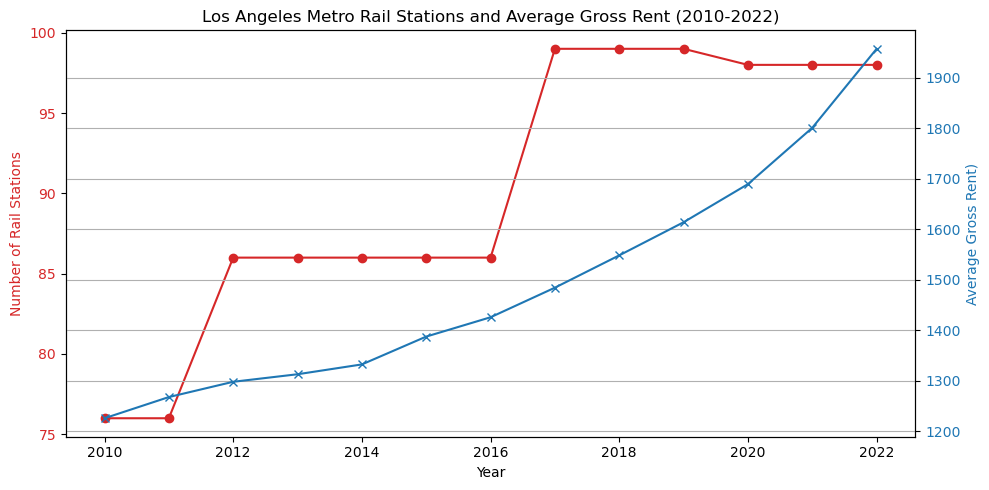

In [2]:
# Load the provided CSV file
file_path = '/home/jovyan/Group assignment 2-xinyi/All Years Median Gross Rent Calculations.csv'
data = pd.read_csv(file_path)


med_gross_rent = data.groupby('year')['med_gross_rent'].mean()
df = {
    'year': [
        2010, 2011, 2012, 2013, 2014, 
        2015, 2016, 2017, 2018, 2019, 
        2020, 2021, 2022
    ],
    'rail_station_number': [
        76, 76, 86, 86, 86, 
        86, 86, 99, 99, 99, 
        98, 98, 98
    ]
}

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Rail Stations', color=color)
ax1.plot(df['year'], df['rail_station_number'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average Gross Rent)', color=color)
ax2.plot(df['year'], med_gross_rent, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Los Angeles Metro Rail Stations and Average Gross Rent (2010-2022)')
fig.tight_layout()  
plt.grid(True)
plt.show()

## Draw the rail stop map of the LA county

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
/tmp/ipykernel_2611/3341999196.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


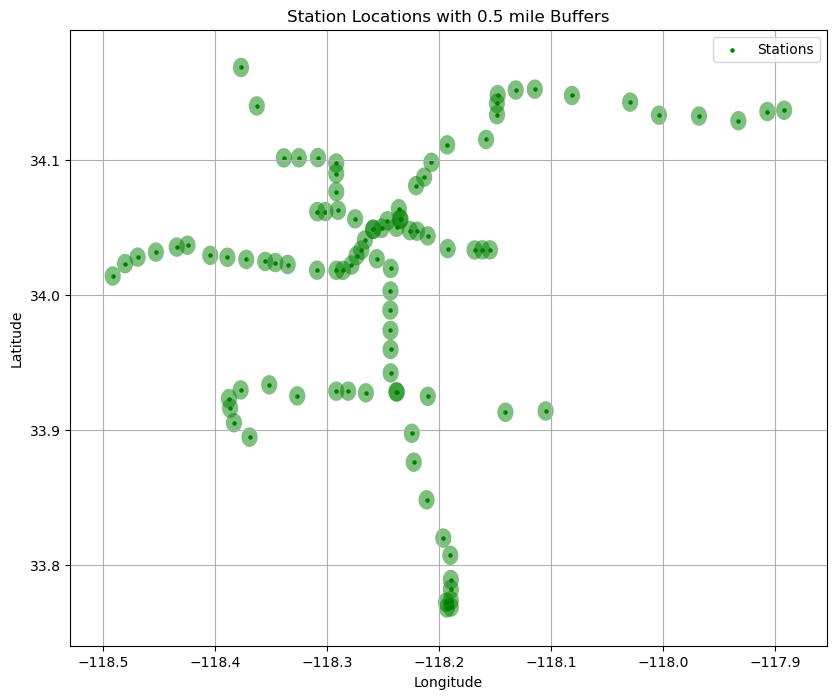

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt


gdf = gpd.read_file ('/home/jovyan/Group assignment 2-xinyi/Stations_All_0316.shp')


# Set the size of the buffer (in meters)
buffer_size = 804  # 0.5 miles

# Check the current CRS of the GeoDataFrame
current_crs = gdf.crs

# We need to convert the CRS to a metric system for accurate buffer calculation
# Using a common metric CRS - World Equidistant Cylindrical (EPSG:4087)
# This CRS uses meters as units and is suitable for worldwide datasets
gdf_metric = gdf.to_crs(epsg=4087)

# Creating the buffer
gdf_buffer = gdf_metric.buffer(buffer_size)

# Converting buffer back to original CRS for plotting
gdf_buffer = gdf_buffer.to_crs(current_crs)

# Creating a GeoDataFrame for the buffer
gdf_buffer = gpd.GeoDataFrame(geometry=gdf_buffer)

# Plotting the stations and their buffers
plt.figure(figsize=(12, 8))
gdf.plot(ax=plt.gca(), marker='o', color='green', markersize=5, label='Stations')
gdf_buffer.plot(ax=plt.gca(), color='green', alpha=0.5, label='0.5mile Buffer')
plt.title('Station Locations with 0.5 mile Buffers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
geojson_path = '/home/jovyan/Group assignment 2-xinyi/Census_Tracts_2020.geojson'
geo_data = gpd.read_file(geojson_path)

Plot latitude and longtitude of the census tracts

<Axes: >

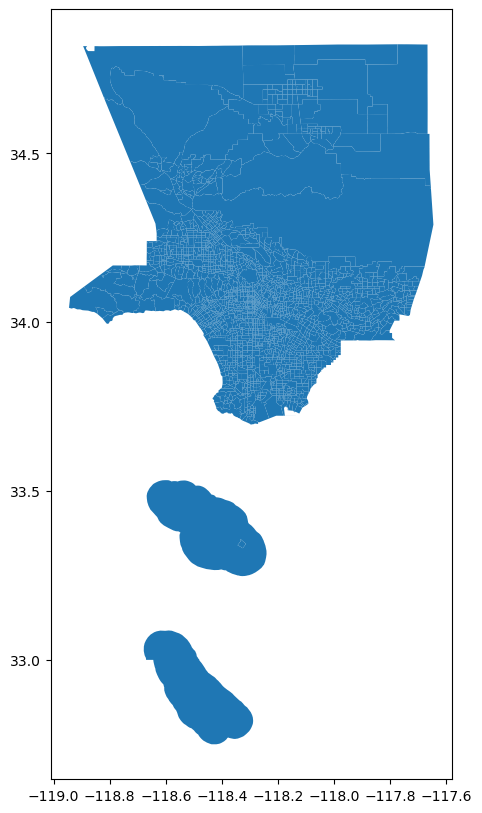

In [5]:
geo_data.plot(figsize=(12,10))

Draw the map of the metro stops in census tracts

In [6]:
# check the data
geo_data = geo_data[['CT20','geometry']]
geo_data.head()

CT20                                           geometry
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

convert data format

In [7]:
geo_data.loc[:, 'geoid20'] = '06' + '037' + geo_data['CT20'].astype(str)
print(geo_data.head())

     CT20                                           geometry      geoid20
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


merge the two datasets

In [8]:
geo_data['geoid20'] = geo_data['geoid20'].astype(int)
data['geoid20'] = data['geoid20'].astype(int)
data_merge = geo_data.merge (data,on='geoid20')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [9]:
#check the new dataset
data_merge.head()

CT20                                           geometry     geoid20  \
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  6037101110   
1  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  6037101110   
2  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  6037101110   
3  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  6037101110   
4  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  6037101110   

                  geoid  year  denom_renters  med_gross_rent  \
0  1400000US06037101110  2022          711.0          1573.0   
1  1400000US06037101110  2021          644.0          1689.0   
2  1400000US06037101110  2020          627.0          1723.0   
3  1400000US06037101110  2019          732.0          1737.0   
4  1400000US06037101110  2018          829.0          1609.0   

   med_gross_rent_adj  
0           1573.0000  
1           1824.2448  
2           1948.6946  
3           1988.0000  
4           1876.0000

In [10]:
# Filter the merged data for the year 2022,2019,2010
data_2022 = data_merge[data_merge['year'] == 2022]
data_2020 = data_merge[data_merge['year'] == 2020]
data_2019 = data_merge[data_merge['year'] == 2019]
data_2010 = data_merge[data_merge['year'] == 2010]

<Axes: >

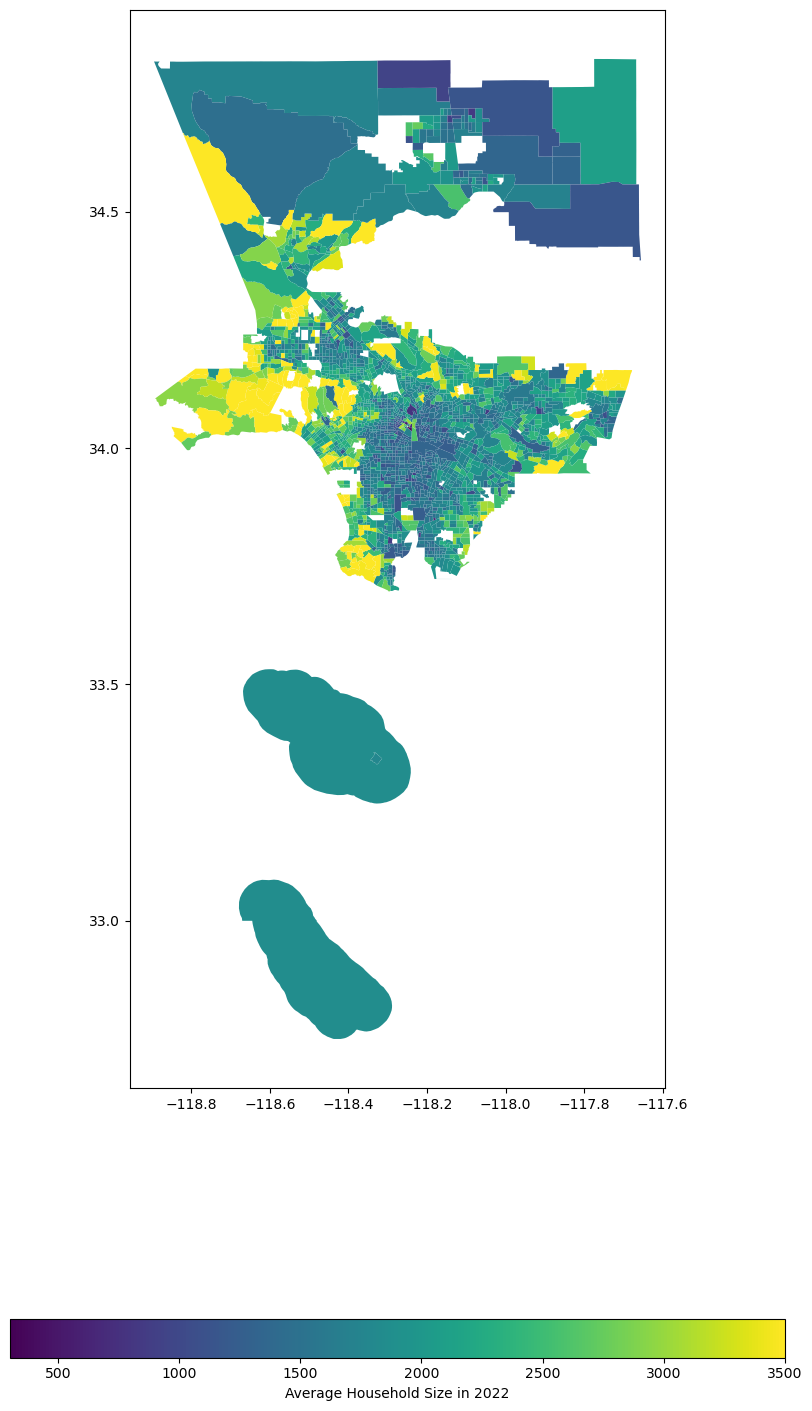

In [11]:
# Plotting the map for 2022
data_2022.plot(figsize=(10,20),
                 column='med_gross_rent',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2022", 'orientation': "horizontal"})

<Axes: >

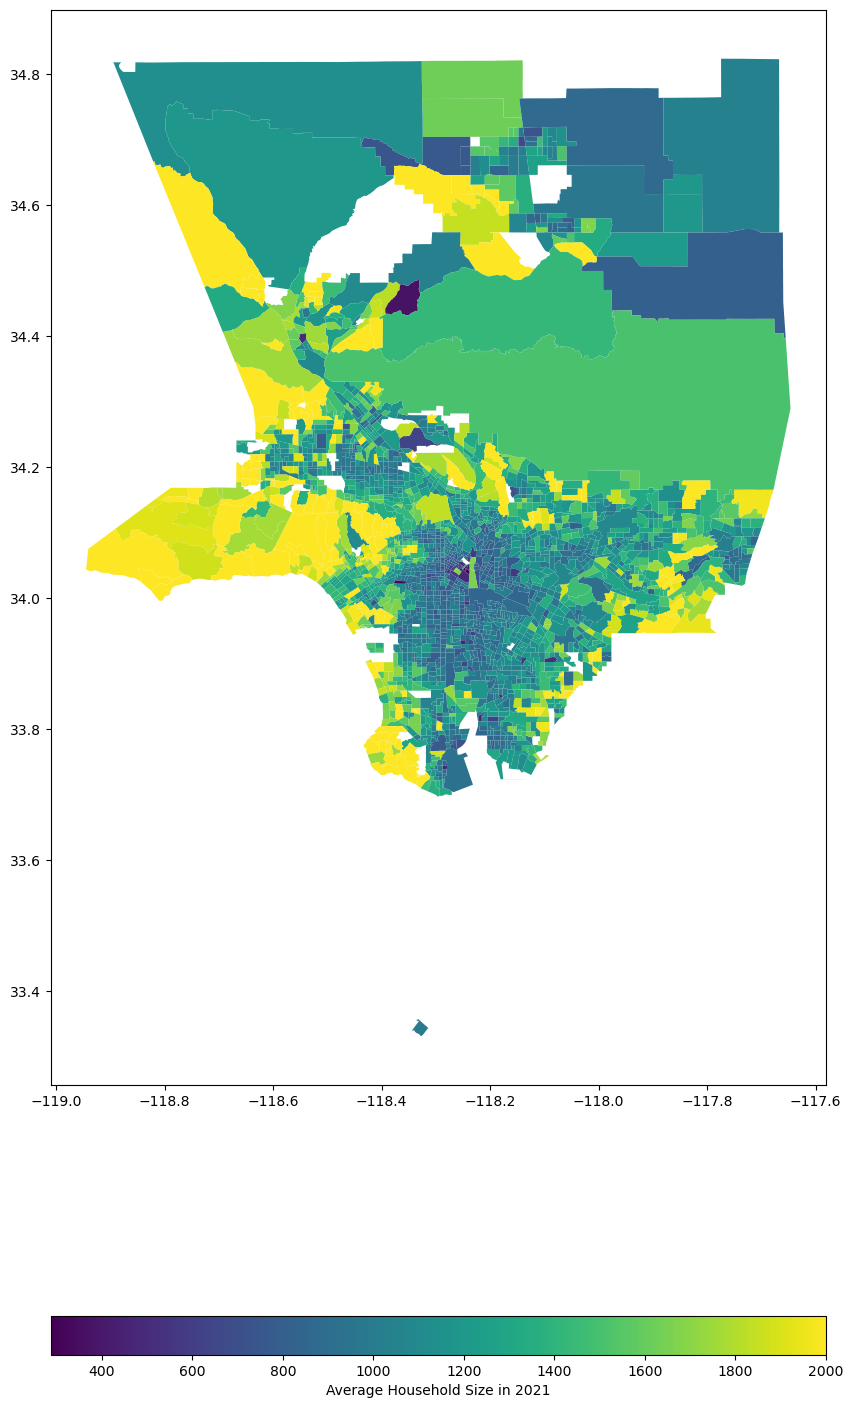

In [12]:
# Plotting the map for 2010
data_2010.plot(figsize=(10,20),
                 column='med_gross_rent',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2021", 'orientation': "horizontal"})

**Compared the household size in each census tract in the past 3 years, we can find that:**

The average household size decreased from 2019 to 2021 in the most of the census tracts.
In the downtown of LA, the household size is larger than that in suburb.

## Draw the map of Tracts below average in 2022 with Station buffer zones

In [13]:
from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt

In [14]:
metro = gpd.read_file('/home/jovyan/Group assignment 2-xinyi/Stations_All_0316.shp', crs='epsg:3857')
metro.info(verbose=True, show_counts=True)

buffer_distance = 0.8/92
buffered_points = metro.geometry.buffer(buffer_distance)

buffered_points_gdf = gpd.GeoDataFrame(geometry=buffered_points)
buffered_points_gdf.crs = 'EPSG:3857'


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LINE       96 non-null     object  
 1   LINENUM    96 non-null     int64   
 2   LINENUM2   96 non-null     int64   
 3   STNSEQ     96 non-null     int64   
 4   STNSEQ2    96 non-null     int64   
 5   DIR        3 non-null      object  
 6   STOPNUM    96 non-null     int64   
 7   STATION    96 non-null     object  
 8   LAT        96 non-null     float64 
 9   LONG       96 non-null     float64 
 10  TPIS_NAME  96 non-null     object  
 11  POINT_X    96 non-null     float64 
 12  POINT_Y    96 non-null     float64 
 13  geometry   96 non-null     geometry
dtypes: float64(4), geometry(1), int64(5), object(4)
memory usage: 10.6+ KB


/tmp/ipykernel_2611/3618252143.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points = metro.geometry.buffer(buffer_distance)


In [15]:
average_rent_2022 = med_gross_rent.loc[2022]
tracts_below_average_2022 = data_2022[
    (data_2022['med_gross_rent'] < average_rent_2022)
]

In [16]:
m = tracts_below_average_2022.explore(
    column='med_gross_rent',  # make choropleth based on "Percent_of_Population_Over_65" column
    legend=True, # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=['med_gross_rent'],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name='Median Gross Rent Below Average (2022)',  # name of the layer in the map
)
folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles

In [17]:
# Add Metro station markers to the map
gdf_buffer.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip=False,  # hide tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="metro stations",  # name of the layer in the map
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles

folium.LayerControl().add_to(m)  # use folium to add layer control

m.save('Tracts_below_average_2022.html')
m  # show map

## Calculate the distance from every tract to the nearest Metro station

In [18]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [19]:
# Calculate the distance from each tract to the nearest station
def nearest_station_distance(tract_geometry, stations_geo_df):
    distances = stations_geo_df.distance(tract_geometry)
    return distances.min()

data_2022=data_2022.to_crs(epsg=4326)
metro = metro.to_crs(epsg=4326)

# Apply the function to each tract
data_2022['nearest_station_distance'] = data_2022.apply(
    lambda row: nearest_station_distance(row.geometry, metro), axis=1)

/tmp/ipykernel_2611/754634033.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = stations_geo_df.distance(tract_geometry)


In [20]:
data_2022['nearest_station_distance'] 

0        0.116768
13       0.123264
26       0.120752
39       0.116703
52       0.117341
           ...   
32007    0.087710
32020    0.070206
32033    0.076093
32046    0.010524
32059    0.000948
Name: nearest_station_distance, Length: 2495, dtype: float64